c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sanje\.cache\huggingface\hub\models--mrm8488--t5-base-finetuned-sarcasm-twitter. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of T5ForSequenceClassification were not initialized from th

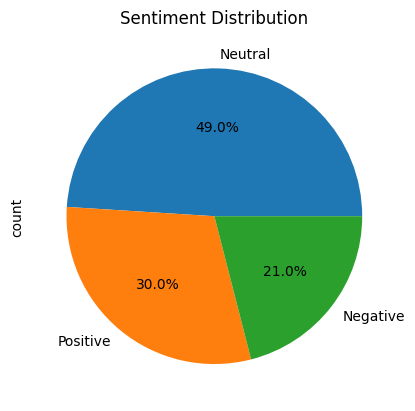

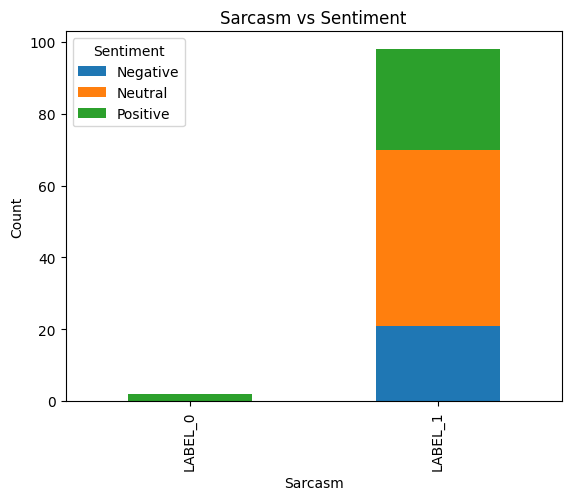

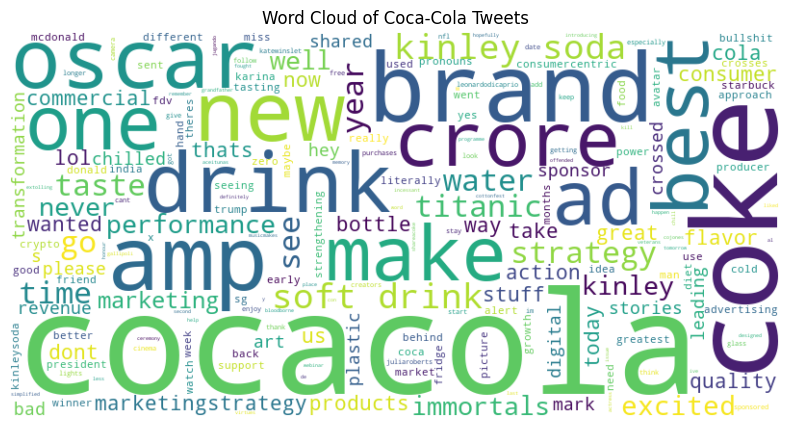

In [4]:
# Sarcasm-Aware Sentiment Analysis of Coca-Cola Mentions on Twitter

import tweepy
import pandas as pd
import re
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ------------------------------
# 1. Setup Twitter API
# ------------------------------
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm'
client = tweepy.Client(bearer_token=bearer_token)

query = 'CocaCola -is:retweet lang:en'
response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=100)
tweet_texts = [tweet.text for tweet in response.data]

# ------------------------------
# 2. Preprocessing
# ------------------------------
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

cleaned_texts = [preprocess(tweet) for tweet in tweet_texts]

# ------------------------------
# 3. Sarcasm Detection
# ------------------------------
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")
sarcasm_results = [sarcasm_model(text)[0]['label'] for text in cleaned_texts]

# ------------------------------
# 4. Sentiment Analysis
# ------------------------------
sentiment_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
sentiment_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

sentiments = []
labels = ['Negative', 'Neutral', 'Positive']
for text in cleaned_texts:
    inputs = sentiment_tokenizer(text, return_tensors="pt")
    outputs = sentiment_model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    sentiments.append(labels[torch.argmax(probs)])

# ------------------------------
# 5. Store & Visualize
# ------------------------------
df = pd.DataFrame({
    'Tweet': tweet_texts,
    'Cleaned': cleaned_texts,
    'Sarcasm': sarcasm_results,
    'Sentiment': sentiments
})

# Pie chart
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', title='Sentiment Distribution')
plt.show()

# Bar chart
sarcasm_sentiment = df.groupby(['Sarcasm', 'Sentiment']).size().unstack().fillna(0)
sarcasm_sentiment.plot(kind='bar', stacked=True, title='Sarcasm vs Sentiment')
plt.xlabel('Sarcasm')
plt.ylabel('Count')
plt.show()

# WordCloud
text_combined = " ".join(df['Cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Coca-Cola Tweets")
plt.show()

# Save results
# df.to_csv('coca_cola_sarcasm_sentiment.csv', index=False)


In [1]:
import torch
print(torch.__version__)


2.6.0+cu126


In [5]:
! pip install transformers


  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.4 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.4 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.4 MB 6.1 MB/s eta 0:00:02
   ------------------- -------------------- 5.0/10.4 MB 6.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.3/10.4 MB 6.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.6/10.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.9/10.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 6.0 MB/s eta 0:00:00
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ----------------- -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.6.0 requires torch>=2.0.0, which is not installed.


In [2]:
! import tweepy


'import' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
! pip install tweepy

  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


Fetched 100 tweets.


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


                                               Tweet  \
0  @CheckersSA selling Coca Cola expiring in a we...   
1  Only ex I want is extra thumpsup \nWanna be br...   
2  Definitely excited to see @KKeed_ 's performan...   
3  jugando al bloodborne chill de cojones con ace...   
4  @actualAlexJames It is as bad as introducing a...   

                                             Cleaned  Sarcasm  
0   selling coca cola expiring in a weeks time fl...  LABEL_0  
1  only ex i want is extra thumpsup \nwanna be br...  LABEL_0  
2  definitely excited to see  s performance at co...  LABEL_0  
3  jugando al bloodborne chill de cojones con ace...  LABEL_0  
4   it is as bad as introducing a word from our s...  LABEL_0  


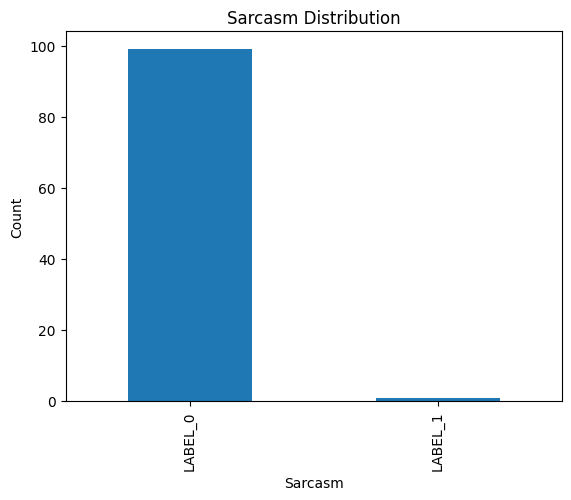

In [5]:
import tweepy
import re
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Twitter API v2 Bearer Token
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm'  # Replace this with your actual Bearer Token

# Initialize Tweepy client
client = tweepy.Client(bearer_token=bearer_token)

# Query for tweets about Coca-Cola
query = 'CocaCola -is:retweet lang:en'
response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=100)

# Extract tweet texts
tweet_texts = [tweet.text for tweet in response.data]
print(f"Fetched {len(tweet_texts)} tweets.")

# Preprocess function
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

# Clean tweets
cleaned_texts = [preprocess(tweet) for tweet in tweet_texts]

# Load sarcasm detection model
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# Detect sarcasm
sarcasm_results = [sarcasm_model(text)[0]['label'] for text in cleaned_texts]

# Create DataFrame
df = pd.DataFrame({
    'Tweet': tweet_texts,
    'Cleaned': cleaned_texts,
    'Sarcasm': sarcasm_results
})

# Display results
print(df.head())

# Visualize sarcasm distribution
sarcasm_count = df['Sarcasm'].value_counts()
sarcasm_count.plot(kind='bar', title="Sarcasm Distribution", xlabel="Sarcasm", ylabel="Count")
plt.show()


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Rate limit exceeded. Waiting for 1 minutes...
Rate limit exceeded. Waiting for 1 minutes...
Rate limit exceeded. Waiting for 1 minutes...
Rate limit exceeded. Waiting for 1 minutes...
Rate limit exceeded. Waiting for 1 minutes...


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cuda:0


Sarcasm detection results:
Empty DataFrame
Columns: [Tweet, Cleaned, Sarcasm]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

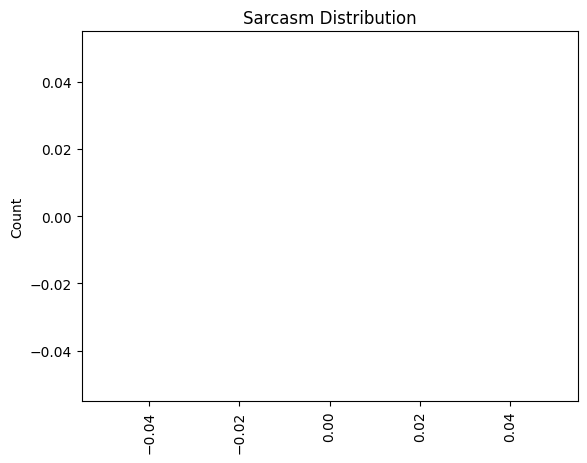

In [1]:
import tweepy
import re
import pandas as pd
from transformers import pipeline
import time
import matplotlib.pyplot as plt

# ------------------------------
# 1. Twitter API v2 Bearer Token
# ------------------------------
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm'  # Replace this with your actual Bearer Token

# Initialize Tweepy client
client = tweepy.Client(bearer_token=bearer_token)

# ------------------------------
# 2. Fetch Tweets from Twitter API with Delay
# ------------------------------
query = 'CocaCola -is:retweet lang:en'  # Search query
max_results = 10  # Number of tweets to fetch per request
tweet_texts = []

# Fetch tweets in chunks to avoid hitting rate limits
for _ in range(5):  # You can adjust the number of iterations to fetch more tweets
    try:
        response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=max_results)
        tweet_texts.extend([tweet.text for tweet in response.data])
        print(f"Fetched {len(response.data)} tweets.")
    except tweepy.TooManyRequests as e:
        print("Rate limit exceeded. Waiting for 1 minutes...")
        time.sleep(1 * 60)  # Wait for 15 minutes before retrying
        continue

# ------------------------------
# 3. Preprocess the Text
# ------------------------------
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'@\w+|#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    return text.lower()  # Convert to lowercase

# Clean the fetched tweets
cleaned_texts = [preprocess(tweet) for tweet in tweet_texts]

# ------------------------------
# 4. Sarcasm Detection using a Pretrained Model
# ------------------------------
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# Detect sarcasm in tweets
sarcasm_results = [sarcasm_model(text)[0]['label'] for text in cleaned_texts]

# ------------------------------
# 5. Create a DataFrame to Store the Results
# ------------------------------
df = pd.DataFrame({
    'Tweet': tweet_texts,
    'Cleaned': cleaned_texts,
    'Sarcasm': sarcasm_results
})

# ------------------------------
# 6. Display Results
# ------------------------------
print("Sarcasm detection results:")
print(df.head())  # Show first few rows for inspection

# ------------------------------
# 7. Visualize the Sarcasm Distribution
# ------------------------------
sarcasm_count = df['Sarcasm'].value_counts()
sarcasm_count.plot(kind='bar', title="Sarcasm Distribution", xlabel="Sarcasm", ylabel="Count")
plt.show()

# ------------------------------
# 8. Print Sarcasm or Not for Each Tweet
# ------------------------------
sarcasm_output = []
for tweet, label in zip(df['Tweet'], df['Sarcasm']):
    if label == 'LABEL_1':  # Sarcastic tweet
        sarcasm_output.append(f"**Sarcastic Tweet:** {tweet}")
    else:
        sarcasm_output.append(f"**Non-Sarcastic Tweet:** {tweet}")

# Output the results
for item in sarcasm_output:
    print(item)


In [ ]:
import tweepy
import re
import pandas as pd
from transformers import pipeline
import time
import matplotlib.pyplot as plt

# ------------------------------
# 1. Twitter API v2 Bearer Token
# ------------------------------
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm'  # Replace with your actual bearer token
client = tweepy.Client(bearer_token=bearer_token)

# ------------------------------
# 2. Fetch Tweets from Twitter API with Delay
# ------------------------------
query = 'CocaCola -is:retweet lang:en'
max_results = 10
tweet_texts = []

for _ in range(5):
    try:
        response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=max_results)
        if response.data:
            tweet_texts.extend([tweet.text for tweet in response.data])
            print(f"Fetched {len(response.data)} tweets.")
        else:
            print("No more tweets found.")
    except tweepy.TooManyRequests:
        print("Rate limit exceeded. Waiting for 1 minute...")
        time.sleep(60)
    except Exception as e:
        print(f"Error: {e}")
        break

# Check if any tweets were fetched
if not tweet_texts:
    print("No tweets fetched. Exiting...")
    exit()

# ------------------------------
# 3. Preprocess the Text
# ------------------------------
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

cleaned_texts = [preprocess(tweet) for tweet in tweet_texts]

# ------------------------------
# 4. Sarcasm Detection using a Pretrained Model
# ------------------------------
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# Detect sarcasm
sarcasm_results = [sarcasm_model(text)[0]['label'] for text in cleaned_texts]

# ------------------------------
# 5. Create and Save DataFrame
# ------------------------------
df = pd.DataFrame({
    'Tweet': tweet_texts,
    'Cleaned': cleaned_texts,
    'Sarcasm': sarcasm_results
})

# Save to CSV
csv_filename = 'sarcasm_results.csv'
df.to_csv(csv_filename, index=False)
print(f"\nResults saved to {csv_filename}")

# ------------------------------
# 6. Visualize Results
# ------------------------------
sarcasm_count = df['Sarcasm'].value_counts()
if not sarcasm_count.empty:
    sarcasm_count.plot(kind='bar', title="Sarcasm Distribution", xlabel="Sarcasm", ylabel="Count")
    plt.show()
else:
    print("No data to plot.")

# ------------------------------
# 7. Print Summary Output
# ------------------------------
for tweet, label in zip(df['Tweet'], df['Sarcasm']):
    tag = "**Sarcastic Tweet:**" if label == 'LABEL_1' else "**Non-Sarcastic Tweet:**"
    print(f"{tag} {tweet}")


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Rate limit exceeded. Waiting for 1 minute...
Rate limit exceeded. Waiting for 1 minute...
Rate limit exceeded. Waiting for 1 minute...
Rate limit exceeded. Waiting for 1 minute...
Rate limit exceeded. Waiting for 1 minute...
No tweets fetched. Exiting...


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cuda:0



Results saved to sarcasm_results.csv
No data to plot.


: 

In [2]:
import requests
import pandas as pd
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Set your Twitter Bearer Token here
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm"

# Headers for authorization
headers = {
    "Authorization": f"Bearer {BEARER_TOKEN}",
}

# Twitter API v2 search endpoint
search_url = "https://api.twitter.com/2/tweets/search/recent"

# Query parameters
query_params = {
    "query": "coca cola -is:retweet lang:en",  # Search query
    "max_results": 5,
    "tweet.fields": "created_at,text"
}

def fetch_tweets():
    print("Fetching tweets...")
    try:
        response = requests.get(search_url, headers=headers, params=query_params)
        if response.status_code == 429:
            print("Rate limit hit. Sleeping for 60 seconds...")
            time.sleep(2*60)
            return fetch_tweets()
        elif response.status_code != 200:
            print("Failed to fetch tweets:", response.status_code, response.text)
            return []

        tweets_data = response.json().get("data", [])
        tweets = [tweet["text"] for tweet in tweets_data]
        return tweets

    except Exception as e:
        print("Error fetching tweets:", e)
        
        return []

# Load sarcasm-aware sentiment model
def load_sarcasm_model():
    print("Loading sarcasm model...")
    model_name = "mrm8488/t5-base-finetuned-sarcasm-twitter"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    return pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Analyze and visualize
def analyze_and_plot(tweets, classifier):
    print("Classifying...")
    results = classifier(tweets, truncation=True)

    df = pd.DataFrame({
        "tweet": tweets,
        "label": [r['label'] for r in results],
        "score": [r['score'] for r in results]
    })

    df.to_csv("sarcasm_results.csv", index=False)
    print("Results saved to sarcasm_results.csv")

    # Visualization
    if not df.empty:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x="label", palette="coolwarm")
        plt.title("Sarcasm-Aware Sentiment Distribution")
        plt.xlabel("Label")
        plt.ylabel("Tweet Count")
        plt.tight_layout()
        plt.savefig("sarcasm_plot.png")
        plt.show()
    else:
        print("No data to plot.")

# 🚀 Run pipeline
tweets = fetch_tweets()

if tweets:
    classifier = load_sarcasm_model()
    analyze_and_plot(tweets, classifier)
else:
    print("No tweets fetched. Skipping analysis.")


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...


KeyboardInterrupt: 

In [3]:
import requests
import pandas as pd
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Set your Twitter Bearer Token here
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAOx90s%2BGoS60Z1J0AfzCLtdo9Ni8%3Da7mG7kXC5wHbAyO9iEbWzUKBrnU1sXN3AVP8Gi06R0ZKqMXtfq"  # Replace with your Bearer Token

# Headers for authorization
headers = {
    "Authorization": f"Bearer {BEARER_TOKEN}",
}

# Twitter API v2 search endpoint
search_url = "https://api.twitter.com/2/tweets/search/recent"

# Query parameters
query_params = {
    "query": "coca OR cola lang:en",  # Search query (broader to get more tweets)
    "max_results": 5,  # Fetch up to 5 recent tweets (adjustable)
    "tweet.fields": "created_at,text"
}

# Function to fetch tweets
def fetch_tweets():
    print("Fetching tweets...")
    try:
        response = requests.get(search_url, headers=headers, params=query_params)
        if response.status_code == 429:
            print("Rate limit hit. Sleeping for 60 seconds...")
            time.sleep(2*60)  # Wait 2 minutes if rate limit is hit
            return fetch_tweets()  # Retry fetching tweets
        elif response.status_code != 200:
            print(f"Failed to fetch tweets: {response.status_code} - {response.text}")
            return []  # Return an empty list if the request fails

        tweets_data = response.json().get("data", [])
        if not tweets_data:
            print("No tweets found.")
        else:
            print(f"Found {len(tweets_data)} tweets.")
        
        # Extract tweet text
        tweets = [tweet["text"] for tweet in tweets_data]
        return tweets

    except Exception as e:
        print(f"Error fetching tweets: {e}")
        return []  # Return empty list if there's an error

# Function to load sarcasm-aware sentiment model
def load_sarcasm_model():
    print("Loading sarcasm model...")
    model_name = "mrm8488/t5-base-finetuned-sarcasm-twitter"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    return pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Function to analyze tweets and save results
def analyze_and_plot(tweets, classifier):
    print("Classifying tweets...")
    results = classifier(tweets, truncation=True)

    # Create DataFrame with results
    df = pd.DataFrame({
        "tweet": tweets,
        "label": [r['label'] for r in results],
        "score": [r['score'] for r in results]
    })

    # Save results to CSV
    df.to_csv("sarcasm_results.csv", index=False)
    print("Results saved to sarcasm_results.csv")

    # Visualization: Countplot of sentiment distribution
    if not df.empty:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x="label", palette="coolwarm")
        plt.title("Sarcasm-Aware Sentiment Distribution")
        plt.xlabel("Label")
        plt.ylabel("Tweet Count")
        plt.tight_layout()
        plt.savefig("sarcasm_plot.png")
        plt.show()
    else:
        print("No data to plot.")

# 🚀 Run the full pipeline
tweets = fetch_tweets()

if tweets:
    classifier = load_sarcasm_model()
    analyze_and_plot(tweets, classifier)
else:
    print("No tweets fetched. Skipping analysis.")


Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...
Fetching tweets...
Rate limit hit. Sleeping for 60 seconds...


KeyboardInterrupt: 

In [ ]:
import tweepy
import pandas as pd
import re
import time

# ---------------------------------------
# 1. Add your Twitter API v2 credentials
# ---------------------------------------
consumer_key = 'tovHowHoJ8PP38zVDsVFihgCV'
consumer_secret = 'oIMEaBEGLzVXApr4Jwn3zy2g6oaSjyvIh77rQMFpbyKTwccM9T'
access_token = '1456694112145395719-hv50bIunOKue7LJrbTgLg0BD7DUyGA'
access_token_secret = 'kwjnk0obTnfUFXZt58yZunzyYtlwSOV2BualesqFuQlEZ'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAINl0wEAAAAAI%2B7IPCKTmyuF%2FyqXqcISY44ODGQ%3Dg7cv4lUpsqvgB9WZKRc26ruaLX6MtGMVak7Ugx3zQZXcSwRVfm'

# ---------------------------------------
# 2. Authenticate with Twitter API v2
# ---------------------------------------
client = tweepy.Client(bearer_token=bearer_token)

# ---------------------------------------
# 3. Search configuration
# ---------------------------------------
query = 'CocaCola -is:retweet lang:en'  # Search query
max_results = 10  # Tweets per request (max 100)
pages = 5         # Number of requests/pages (total tweets = max_results * pages)

tweet_texts = []

# ---------------------------------------
# 4. Fetch tweets with retry logic
# ---------------------------------------
for page in range(pages):
    try:
        response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=max_results)
        if response.data:
            for tweet in response.data:
                tweet_texts.append(tweet.text)
            print(f"Page {page + 1}: Fetched {len(response.data)} tweets.")
        else:
            print(f"Page {page + 1}: No more tweets found.")
            break
    except tweepy.TooManyRequests:
        print("Rate limit exceeded. Waiting for 1 minute...")
        time.sleep(60)
    except Exception as e:
        print(f"Error: {e}")
        break

# ---------------------------------------
# 5. Preprocess tweets
# ---------------------------------------
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

cleaned_texts = [preprocess(tweet) for tweet in tweet_texts]

# ---------------------------------------
# 6. Save to CSV
# ---------------------------------------
df = pd.DataFrame({
    'Original Tweet': tweet_texts,
    'Cleaned Tweet': cleaned_texts
})

csv_filename = 'coca_cola_tweets.csv'
df.to_csv(csv_filename, index=False)
print(f"\n✅ Saved {len(df)} tweets to '{csv_filename}'")


Error: 401 Unauthorized
Unauthorized

✅ Saved 0 tweets to 'coca_cola_tweets.csv'


In [8]:
from transformers import pipeline
import re

# ------------------------------
# 1. Load the Sarcasm Detection Model
# ------------------------------
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# ------------------------------
# 2. Preprocessing function
# ------------------------------
def preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove @mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove non-alphanumeric characters (keep words and spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

# ------------------------------
# 3. Function to Predict Sarcasm in User Input
# ------------------------------
def predict_sarcasm(input_text):
    # Preprocess the input text
    cleaned_text = preprocess(input_text)
    
    # Predict sarcasm using the pre-trained model
    prediction = sarcasm_model(cleaned_text)
    
    # Get the sarcasm label (sarcastic or not sarcastic)
    sarcasm_label = prediction[0]['label']
    
    return sarcasm_label

# ------------------------------
# 4. User Input for Sarcasm Detection
# ------------------------------
user_input = input("I swear, I can taste the corporate greed in every sip")

# Get prediction
sarcasm_result = predict_sarcasm(user_input)

# Display result
if sarcasm_result == "LABEL_1":
    print("The input text is sarcastic.")
else:
    print("The input text is not sarcastic.")


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


The input text is not sarcastic.


In [1]:
from transformers import pipeline
import re

# ------------------------------
# 1. Load the Sarcasm Detection Model
# ------------------------------
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# ------------------------------
# 2. Preprocessing function
# ------------------------------
def preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove @mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove non-alphanumeric characters (keep words and spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

# ------------------------------
# 3. Function to Predict Sarcasm in User Input
# ------------------------------
def predict_sarcasm(input_text):
    # Preprocess the input text
    cleaned_text = preprocess(input_text)
    
    # Predict sarcasm using the pre-trained model
    prediction = sarcasm_model(cleaned_text)
    
    # Get the sarcasm label (sarcastic or not sarcastic)
    sarcasm_label = prediction[0]['label']
    
    return sarcasm_label

# ------------------------------
# 4. User Input for Sarcasm Detection
# ------------------------------
user_input = input("I swear, I can taste the corporate greed in every sip")

# Get prediction
sarcasm_result = predict_sarcasm(user_input)

# Display result based on the correct labels
if sarcasm_result == "LABEL_1":
    print("The input text is sarcastic.")
else:
    print("The input text is not sarcastic.")


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only 

The input text is sarcastic.


In [1]:
import streamlit as st
import pandas as pd
import tweepy
import re
from transformers import pipeline
import matplotlib.pyplot as plt

# Load sarcasm detection model
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# Preprocess tweet text
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

# Twitter API setup
def twitter_client():
    return tweepy.Client(bearer_token="YOUR_BEARER_TOKEN_HERE")  # Replace

# Fetch tweets from Twitter API
def fetch_tweets(query, count):
    client = twitter_client()
    tweets = []
    response = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=min(count, 100))
    if response.data:
        tweets = [tweet.text for tweet in response.data]
    return tweets

# Streamlit App
st.title("🤖 Sarcasm Detection App")

tab1, tab2 = st.tabs(["🔍 Twitter Sarcasm", "💬 User Input"])

# ----------- TAB 1: Twitter -----------
with tab1:
    st.subheader("Search Tweets and Detect Sarcasm")
    query = st.text_input("Enter a Twitter search query:", "CocaCola")
    count = st.slider("Number of tweets to fetch", 10, 100, 20)
    if st.button("Fetch and Analyze Tweets"):
        raw_tweets = fetch_tweets(f"{query} -is:retweet lang:en", count)
        cleaned = [preprocess(t) for t in raw_tweets]
        labels = [sarcasm_model(t)[0]['label'] for t in cleaned]
        df = pd.DataFrame({'Tweet': raw_tweets, 'Sarcasm': labels})
        st.write(df)
        df.to_csv("twitter_sarcasm_results.csv", index=False)
        st.success("✅ Results saved to twitter_sarcasm_results.csv")

        # Plot
        st.subheader("Sarcasm Distribution")
        st.bar_chart(df['Sarcasm'].value_counts())

# ----------- TAB 2: User Input -----------
with tab2:
    st.subheader("Check if your sentence is sarcastic")
    user_text = st.text_area("Enter text here:")
    if st.button("Analyze Text"):
        clean_text = preprocess(user_text)
        result = sarcasm_model(clean_text)[0]
        st.markdown(f"**Prediction:** {result['label']} (Confidence: {result['score']:.2f})")


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only 

In [1]:
from fastapi import FastAPI
from pydantic import BaseModel
from transformers import pipeline
import re

# Initialize FastAPI app
app = FastAPI(title="Sarcasm Detection API")

# Load sarcasm detection model
sarcasm_model = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter")

# Input schema
class TextInput(BaseModel):
    text: str

# Preprocess function
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

# API route
@app.post("/predict/")
def predict_sarcasm(input_data: TextInput):
    cleaned_text = preprocess(input_data.text)
    prediction = sarcasm_model(cleaned_text)
    label = prediction[0]['label']
    
    result = "sarcastic" if label == "LABEL_1" else "not sarcastic"

    return {
        
        "text": input_data.text,
        "sarcasm": result
    }


c:\Users\sanje\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only 